# Boston: A Cold City



## Table of Contents
- links?


# Links to datasets

[matplotlib Documentation](https://matplotlib.org/contents.html)

[matplotlib Documentation](https://matplotlib.org/contents.html)

[matplotlib Documentation](https://matplotlib.org/contents.html)

## Introduction or Abstract
Something something something



## Methods

## Results



https://www.kaggle.com/jqpeng/boston-weather-data-jan-2013-apr-2018

## Conclusion

In [3]:
# All imports go in this block
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

First, we load our weather dataset and prepare it

In [4]:
# Loading data from files goes in this block
#df_311_weather_income = pd.read_csv('data/311_weather_income.csv')

/Users/matt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [136]:
df_weather = pd.read_csv("data/Boston weather_clean.csv")

In [153]:
consecutive_snow_days = [0]
days_since_last_snow = [365]
accumulated_snow = [0]
for index, row in df_weather.iterrows():

    if row['Events'] == 'Snow' or row['Events'] == 'Both' or row['Snowfall (in)'] > 0:
        if consecutive_snow_days[-1] == 0:
            accumulated_snow.append(float(row['Snowfall (in)']))        
        else:
            accumulated_snow.append(accumulated_snow[-1] + row['Snowfall (in)'])
        
        consecutive_snow_days.append(consecutive_snow_days[-1] + 1)
        days_since_last_snow.append(0)
    else:
        accumulated_snow.append(accumulated_snow[-1])
        consecutive_snow_days.append(0)
        days_since_last_snow.append(days_since_last_snow[-1] + 1)
df_weather['consecutive_snow_days'] = consecutive_snow_days[1:]
df_weather['days_since_last_snow'] = days_since_last_snow[1:]
df_weather['accumulated_snow'] = accumulated_snow[1:]

In [154]:
df_weather

,Year,Month,Day,High Temp (F),Avg Temp (F),Low Temp (F),High Dew Point (F),Avg Dew Point (F),Low Dew Point (F),High Humidity (%),Avg Humidity (%),Low Humidity (%),High Sea Level Press (in),Avg Sea Level Press (in),Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events,consecutive_snow_days,days_since_last_snow,accumulated_snow
0,2008,1,1,40,34,28,37,31,22,92,79,66,30.18,29.78,29.56,10,8,1,23,10,36,0.18,0.18,Both,1,0,0.18
1,2008,1,2,33,22,10,28,18,-3,82,66,49,30.20,29.79,29.55,10,10,9,28,15,38,0.00,0.00,Snow,2,0,0.18
2,2008,1,3,14,11,7,-3,-7,-9,60,50,40,30.62,30.47,30.22,10,10,10,25,17,32,0.00,0.00,None,0,1,0.18
3,2008,1,4,32,20,8,13,5,-8,63,50,36,30.60,30.45,30.37,10,10,10,23,12,28,0.00,0.00,None,0,2,0.18
4,2008,1,5,42,35,27,26,16,12,64,47,30,30.38,30.30,30.17,10,10,10,16,9,23,0.00,0.00,None,0,3,0.18
5,2008,1,6,47,42,36,34,30,24,82,69,55,30.22,30.19,30.15,10,10,9,15,7,20,0.00,0.00,None,0,4,0.18
6,2008,1,7,55,45,35,43,38,32,92,77,61,30.21,30.17,30.13,10,8,5,18,7,22,0.00,0.00,None,0,5,0.18
7,2008,1,8,67,56,45,49,45,41,86,69,52,30.13,30.05,29.93,10,9,7,18,12,23,0.00,0.00,None,0,6,0.18
8,2008,1,9,62,54,46,52,41,17,90,57,24,29.93,29.79,29.64,10,10,9,29,18,37,0.00,0.00,Rain,0,7,0.18
9,2008,1,10,49,44,38,31,25,21,70,52,34,30.12,30.07,29.92,10,10,10,16,11,22,0.00,0.00,None,0,8,0.18


In [94]:
# Load 311 dataset
df_311 = pd.read_csv('data/311.csv')

KeyboardInterrupt: 

In [44]:
df_311['open_dt'] = pd.to_datetime(df_311['open_dt'])
df_311['Year'] = df_311['open_dt'].apply(lambda date: date.year)
df_311['Month'] = df_311['open_dt'].apply(lambda date: date.month)
df_311['Day'] = df_311['open_dt'].apply(lambda date: date.day)

In [155]:
df_311_weather = pd.merge(df_311, df_weather, on=['Year', 'Month', 'Day'])

In [67]:
df_income = pd.read_csv('data/median income.csv', delimiter=";")

In [68]:
def convert_neighborhood(neighborhood):
    conversions = [("Allston / Brighton", "Allston/Brighton"),
                   ("Allston", "Allston/Brighton"),
                   ("Brighton", "Allston/Brighton"),
                   ("Back Bay", "Back Bay/Beacon Hill"),
                   ("Beacon Hill", "Back Bay/Beacon Hill"),
                   ("Fenway / Kenmore / Audubon Circle / Longwood", "Fenway/Kenmore")]
    for left, right in conversions:
        if neighborhood == left:
            return right
    return neighborhood

In [156]:
df_311_weather['neighborhood'] = df_311_weather['neighborhood'].apply(convert_neighborhood)

correlate region with frequency of 311 reports
correlate income with frequency of 311 reports

correlate weather with type of 311 report
correlate weather with number of 311 reports on that day



1. Make visualizations (individually) using our merged dataset
2. Look at those visualizations and come up with more questions to ask about the data


3. Merge demographics dataset into current dataset


In [97]:
# Clean up dollar strings into numbers
from re import sub
from decimal import Decimal
df_income['median household income'] = df_income['median household income'].apply(lambda money: Decimal(sub(r'[^\d.]', '', money)))

TypeError: expected string or bytes-like object

In [197]:
df = pd.merge(df_311_weather, df_income, left_on="neighborhood", right_on="region", how="left")
#select_by = (df['Year'] == 2014) & (df['Month'] > 8) | ((df['Year'] == 2015) & (df['Month'] < 5))
#df = df[select_by]

In [99]:
# Data manipulation: get counts of reports by neighborhood
value_counts = df["neighborhood"].value_counts()
value_counts

Dorchester                                181977
Roxbury                                   109818
Allston/Brighton                           93891
Back Bay/Beacon Hill                       84319
Jamaica Plain                              83393
South Boston / South Boston Waterfront     80828
Downtown / Financial District              71991
East Boston                                66998
West Roxbury                               60735
Hyde Park                                  59040
Greater Mattapan                           58183
South End                                  54848
Roslindale                                 52780
                                           44500
Charlestown                                37064
Boston                                     29217
Fenway/Kenmore                             26934
Mission Hill                               21978
South Boston                                7129
Mattapan                                    1685
Chestnut Hill       

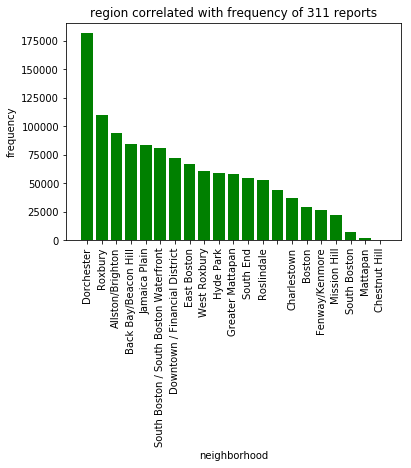

In [100]:
x_pos = np.arange(len(value_counts.keys()))
plt.bar(x_pos, list(value_counts[key] for key in value_counts.keys()), align='center',
        color='green', ecolor='black')
plt.xticks(x_pos, value_counts.keys(), rotation='vertical')
plt.xlabel("neighborhood")
plt.ylabel("frequency")
plt.title("region correlated with frequency of 311 reports")
plt.show()

In [101]:
# Data manipulation: get counts of reports by region
value_counts = df_311_weather_income["income"].value_counts()
value_counts

45807    18875
30654    11380
52362     8920
55861     8676
82742     7514
71066     6865
53474     6698
43511     6650
51870     5293
62702     5199
83926     4104
52433     2480
32509     2438
63747      711
42164      172
Name: income, dtype: int64

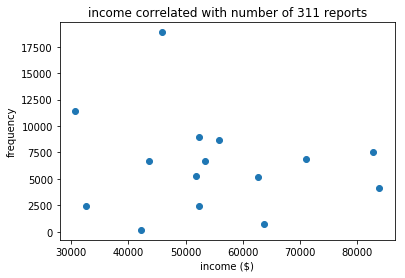

In [102]:
# Plot how many of our reports come from low vs high income areas
plt.scatter(list(map(lambda x: int(x), value_counts.keys())), list(value_counts[key] for key in value_counts.keys()))
plt.xlabel("income ($)")
plt.ylabel("frequency")
plt.title("income correlated with number of 311 reports")
plt.show()

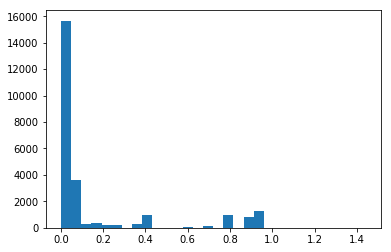

In [103]:
pd.set_option('display.max_columns', None)
plt.hist(df_311_weather_income[df_311_weather_income['type'] == 'Request for Snow Plowing']['Snowfall (in)'], bins=30)

plt.show()

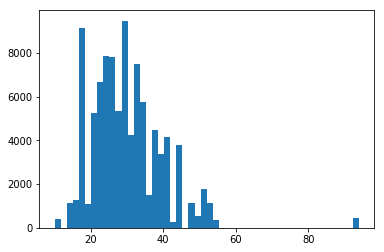

In [104]:
# Data manipulation: Put snowfall into bins
plt.hist(df_311_weather_income['High Wind Gust (mph)'], bins=50)

plt.show()

- Not sure how to normalize our data
- Snow has a delayed effect - requests related to snow can happen the day after it snows

Correlate 311 with demographics (income, race, etc)

In [105]:
df

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,type,queue,department,submittedphoto,closedphoto,location,fire_district,pwd_district,city_council_district,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source,Year,Month,Day,High Temp (F),Avg Temp (F),Low Temp (F),High Dew Point (F),Avg Dew Point (F),Low Dew Point (F),High Humidity (%),Avg Humidity (%),Low Humidity (%),High Sea Level Press (in),Avg Sea Level Press (in),Low Sea Level Press (in),High Visibility (mi),Avg Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events,consecutive_snow_days,days_since_last_snow,region,median household income
0,101000295613,2011-07-01 01:32:33,2011-07-15 01:32:32,2011-07-01 05:06:58,ONTIME,Closed,Case Closed Case Resolved replaced 100 amp fus...,Street Light Outages,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,PWDx,NaN,NaN,INTERSECTION of Groveland St & River St Matta...,8,07,3,B3,Greater Mattapan,7,Ward 17,1714,INTERSECTION Groveland St & River St,NaN,42.2715,-71.0772,Employee Generated,2011,7,1,78,72,66,63,57,51,78,63,47,30.03,29.96,29.90,10,10,10,16,7,18,0.0,0.00,None,0,99,NaN,NaN
1,101000295614,2011-07-01 02:18:31,2011-07-05 02:18:31,2011-07-01 06:12:43,ONTIME,Closed,Case Closed Case Scheduled Items have been sch...,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,NaN,NaN,39 Lorraine St Roslindale MA 02131,12,06,5,E5,Roslindale,10,Ward 20,2008,39 Lorraine St,2131.0,42.2839,-71.1447,Self Service,2011,7,1,78,72,66,63,57,51,78,63,47,30.03,29.96,29.90,10,10,10,16,7,18,0.0,0.00,None,0,99,Roslindale,62702
2,101000295620,2011-07-01 06:24:38,2011-07-15 06:24:38,2011-08-23 10:33:03,OVERDUE,Closed,Case Closed Case Resolved Job Completed.,Street Light Outages,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),PWDx,NaN,NaN,INTERSECTION of Bragdon St & Washington St Ro...,9,10B,7,E13,Roxbury,13,Ward 11,1103,INTERSECTION Bragdon St & Washington St,NaN,42.3173,-71.0968,Constituent Call,2011,7,1,78,72,66,63,57,51,78,63,47,30.03,29.96,29.90,10,10,10,16,7,18,0.0,0.00,None,0,99,Roxbury,30654
3,101000295624,2011-07-01 06:50:25,NaN,2011-07-01 06:50:29,ONTIME,Closed,Case Closed Internal Case,Highway Maintenance,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,PWDx,NaN,NaN,1053 Dorchester Ave Dorchester MA 02125,7,03,3,C11,Dorchester,7,Ward 13,1309,1053 Dorchester Ave,2125.0,42.3594,-71.0587,Employee Generated,2011,7,1,78,72,66,63,57,51,78,63,47,30.03,29.96,29.90,10,10,10,16,7,18,0.0,0.00,None,0,99,Dorchester,45807
4,101000295625,2011-07-01 06:55:10,2011-07-05 06:55:10,2011-07-05 09:42:04,OVERDUE,Closed,Case Closed Case Resolved Delivered on 7/5. ...,Sticker Request,Public Works Department,Recycling,Sticker Request,PWDx_Sticker Request,PWDx,NaN,NaN,392 K St South Boston MA 02127,6,05,2,C6,South Boston / South Boston Waterfront,5,Ward 7,0701,392 K St,2127.0,42.3305,-71.0371,Self Service,2011,7,1,78,72,66,63,57,51,78,63,47,30.03,29.96,29.90,10,10,10,16,7,18,0.0,0.00,None,0,99,NaN,NaN
5,101000295631,2011-07-01 07:33:45,2011-07-05 07:33:44,2011-07-01 07:42:58,ONTIME,Closed,Case Closed Case Invalid,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,PWDx,NaN,NaN,27 Lambert Ave Roxbury MA 02119,7,10B,7,B2,Roxbury,13,Ward 9,0905,27 Lambert Ave,2119.0,42.3279,-71.0900,Employee Generated,2011,7,1,78,72,66,63,57,51,78,63,47,30.03,29.96,29.90,10,10,10,16,7,18,0.0,0.00,None,0,99,Roxbury,30654
6,101000295633,2011-07-01 07:36:03,2011-07-05 07:36:02,2011-07-01 07:36:43,ONTIME,Closed,Case Closed Case Scheduled Items have been sch...,Schedule a Bulk Item Pickup,Public Works Departme

Look into "Both" - is Both worse than either Rain or Snow

In [158]:
# What is the average days_since_last_snow for snow removal requests
# 1. filter the table for only entries about snow removal
plow_requests = df[df['case_title'].str.contains("Snow", na=False)]
# 2. for those entries, compute the average of days_since_last_snow
select_by = (plow_requests['Year'] == 2014) & (plow_requests['Month'] > 8) | ((plow_requests['Year'] == 2015) & (plow_requests['Month'] < 5))
print(plow_requests[select_by]['days_since_last_snow'].mean())
print(plow_requests['days_since_last_snow'].mean())

0.281981759921124
0.41537880548454564


In [ ]:
# For longer consecutive snow days are there more requests?


In [198]:
# lists all the data in which there was snowfall
snowed = df["Snowfall (in)"] > 0
snow_data = df[snowed]

In [199]:
df["case_title"] = df["case_title"].astype(str)

In [200]:
#311 report has the word snow in it
has_snow = df["case_title"].str.contains("Snow")
reason_snow = df[has_snow]

In [201]:
# lists all the data in which there wasn't snowfall
no_snow = df["Snowfall (in)"] == 0

#trying to get dataset in which there wasn't snow but still had a report on snow
no_snow_data = df[no_snow][has_snow]

/Users/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [202]:
# count in which there was no snow yet reports on 311 related to snow
count_no = no_snow_data['case_title'].count()
count_no

31499

In [203]:
yes_snow_data = df[snowed][has_snow]

/Users/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [204]:
# count in which there was snow AND reports on 311 related to snow
count_yes = yes_snow_data['case_title'].count()
count_yes

37349

In [205]:
# 311 requests that do not have the word "snow" in it
no_word = df["case_title"].str.contains("Snow") == False
reason_nosnow = df[no_word]

In [206]:
# no snow in 311 report but yes snow in terms of weather
yesSnow_noReport = df[snowed][no_word]

/Users/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [207]:
# count in which there was no snow in the 311 report but yes snow in terms of weather
count_noSnowReport = yesSnow_noReport['case_title'].count()
count_noSnowReport

83653

In [208]:
# no snow in 311 report and no snow in terms of weather
noSnow_noReport = df[no_snow][no_word]

/Users/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [209]:
# count in which there was no snow in 311 report and no snow in terms of weather
count_noSnownoReport = noSnow_noReport['case_title'].count()
count_noSnownoReport

1076151

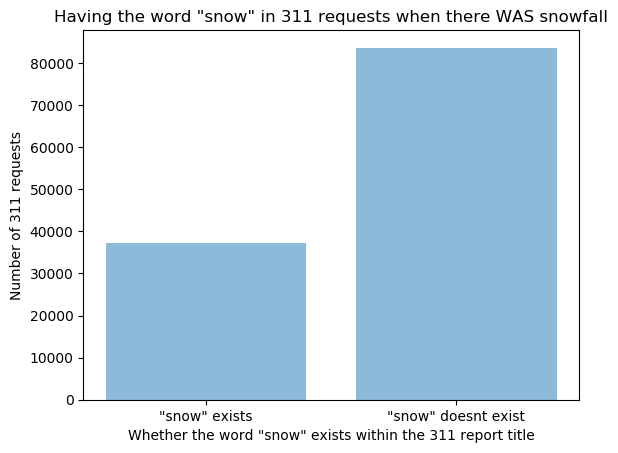

In [210]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
x_pos = ('"snow" exists', '"snow" doesnt exist')
y_pos = np.arange(len(x_pos))
performance = [count_yes,count_noSnowReport]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x_pos)
plt.ylabel('Number of 311 requests')
plt.xlabel('Whether the word "snow" exists within the 311 report title')
plt.title('Having the word "snow" in 311 requests when there WAS snowfall')
 
plt.show()

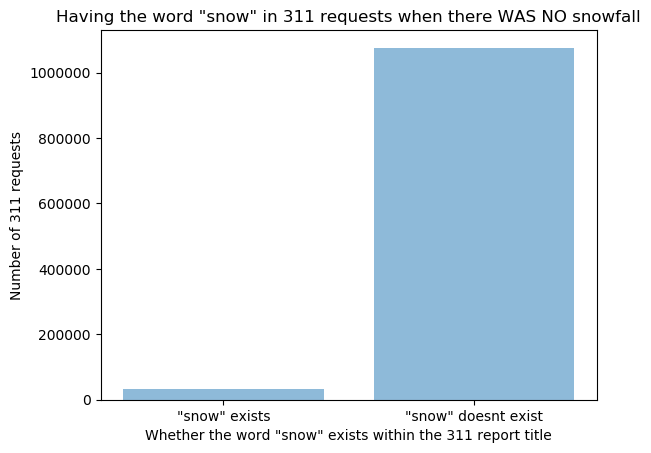

In [211]:
x_pos = ('"snow" exists', '"snow" doesnt exist')
y_pos = np.arange(len(x_pos))
performance = [count_no,count_noSnownoReport]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, x_pos)
plt.ylabel('Number of 311 requests')
plt.xlabel('Whether the word "snow" exists within the 311 report title')
plt.title('Having the word "snow" in 311 requests when there WAS NO snowfall')
 
plt.show()

Winter 14-15:
    More snow plow requests than other requests occur on days that have > 0.0 snowfall in inches
    When there is no snow fall, most reports do not have the word snow
Overall:
    There are more non-snow plow requests on days that have > 0.0 snowfall
    Almost no requests for snow plowing on days that have no snow